# Digit(手書き数字)の分類
0〜9のラベルを画像データから分類する  
画像データは28×28で0から255の値の数値で表現されている  
<img src='https://image.itmedia.co.jp/ait/articles/2001/22/di-01.gif' width=40%><img src='https://www.infiniteloop.co.jp/blog/wp-content/uploads/2018/01/mnist_sample-640x378.png' width=60%>

In [ ]:
#tensorflow バージョン1に変更する必要あり
#2021.08.12から仕様が変更された

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## mnistデータの読み込み

In [ ]:
from sklearn import datasets, model_selection
import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=False)
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

## 問題
mnistの画像データはベクトル(1次元配列)として格納されている  
画像データを3次元のテンソルに変換して入力データを作成しよう

**必要なこと**


*   x_dataの作成
*   x_dataを3次元のテンソルに変換する
*   x_dataのmin-max正規化
*   y_target(ordinal data)の読み込み
*   y_data(one-hot data)の作成



In [ ]:
mnist_data = mnist['data']
mnist_target = mnist['target']

## x_dataの作成

In [ ]:
x_data = mnist_data
print(x_data.shape)

(70000, 784)


#### x_dataを3次元のテンソルに変換する

<img src='https://github.com/kaichun789/MachineLeaning_Lesson/blob/main/image/image12.jpg?raw=true' width=70% >

In [ ]:
#今までのデータの形は(データ数,データの要素数)だった
#これを(データ数,データの一片1,データの一片2)に直そう
   #ここで データの一片1 × データの一片2 = データの要素数である

#画像データの一片はそれぞれ28
x_data = x_data.reshape(-1,28,28)
print(x_data.shape)

(70000, 28, 28)


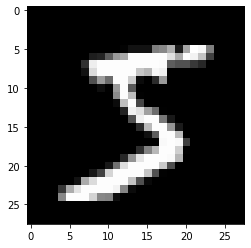

In [ ]:
#データ番号(1次元目)を選択するとデータを可視化できる
plt.imshow(x_data[0,:,:],cmap='gray')
plt.show()

#### 入力データのmin-max正規化
mnistのデータがとりうる値は0〜255と決まっている  
このように決まった範囲でデータが格納されている場合はmin-max正規化を使うこともできる  
min-max正規化はデータを0から1の表現に変換することを指す

In [ ]:
#min-max正規化を行うため、最大値255.0で全体を割る
x_data = x_data/255.0

### y_target(ordinal data)の読み込み
mnist_targetはstr型で格納されている  
ndarray型に変換し、その型をint8型に変えよう

In [ ]:
#np.arrayを使い,dtype='int8'を引数に入れることでint型にできる
print(type(mnist_target[0]))
print('↓変換')

y_target = np.array(mnist_target,dtype='int8')
print(type(y_target))

<class 'str'>
↓変換
<class 'numpy.ndarray'>


### y_data(one-hot data)の作成

In [ ]:
y_data = np.eye(10)[y_target]
print(y_data.shape)

(70000, 10)


### データの分割
入力データと正解データを


*   x_train
*   x_test
*   y_train
*   y_test  
に分ける

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,stratify=y_data)

print('x_trainの形')
print(x_train.shape)
print('\ny_trainの形')
print(y_train.shape)
print('\nx_testの形')
print(x_test.shape)
print('\ny_testの形')
print(y_test.shape)

x_trainの形
(52500, 28, 28)

y_trainの形
(52500, 10)

x_testの形
(17500, 28, 28)

y_testの形
(17500, 10)


## 分類器の作成

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Activation,Flatten,Dropout

mnist_model = Sequential([
                           Conv2D(2,(2,2),input_shape=(28,28,1),padding='same',activation='relu'),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPool2D((2,2)),

                           Conv2D(2,(2,2),padding='same',activation='relu'),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPool2D((2,2)),
                          
                           Conv2D(2,(2,2),padding='same',activation='relu'),
                           BatchNormalization(),
                           Activation('relu'),
                           MaxPool2D((2,2)),

                           Flatten(),
                           Dense(10,activation='softmax')
],name='mnist_model')
mnist_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 2)         10        
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 2)         8         
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 2)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 2)         18        
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 2)         8         
_______________________________________

In [ ]:
from keras.optimizers import Adam
mnist_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

## 学習

In [ ]:
xtrain_cnn = x_train.reshape(-1,28,28,1)
xtest_cnn = x_test.reshape(-1,28,28,1)
mnist_his = mnist_model.fit(xtrain_cnn,y_train,epochs=5,validation_split=0.2)


Train on 42000 samples, validate on 10500 samples
Epoch 1/5
42000/42000 [==============================] - 27s 646us/step - loss: 1.6154 - accuracy: 0.4771 - val_loss: 0.9730 - val_accuracy: 0.6863
Epoch 2/5
42000/42000 [==============================] - 26s 621us/step - loss: 0.8243 - accuracy: 0.7331 - val_loss: 0.7217 - val_accuracy: 0.7652
Epoch 3/5
42000/42000 [==============================] - 26s 621us/step - loss: 0.6999 - accuracy: 0.7730 - val_loss: 0.6621 - val_accuracy: 0.7845
Epoch 4/5
42000/42000 [==============================] - 26s 622us/step - loss: 0.6422 - accuracy: 0.7858 - val_loss: 0.6094 - val_accuracy: 0.7976
Epoch 5/5
42000/42000 [==============================] - 26s 622us/step - loss: 0.6018 - accuracy: 0.7983 - val_loss: 0.5818 - val_accuracy: 0.8073


## 学習結果

学習経過をみてみる

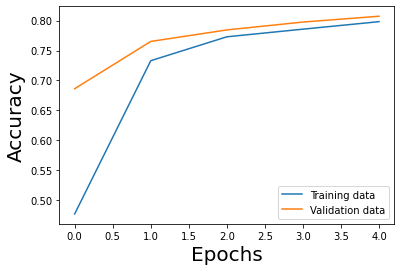

In [ ]:
plt.plot(mnist_his.history['accuracy'],label='Training data')
plt.plot(mnist_his.history['val_accuracy'],label='Validation data')
plt.legend(loc='lower right')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()

テストデータを使って学習したモデルの精度を検証する  

In [ ]:
mnist_loss,mnist_acc = mnist_model.evaluate(xtest_cnn,y_test)
print('test_data accuracy : %.3f'%(mnist_acc))

17500/17500 [==============================] - 4s 256us/step
test_data accuracy : 0.806


実際に予測してみる

In [ ]:
mnist_pred = mnist_model.predict(x_data.reshape(-1,28,28,1))
print('予測完了')

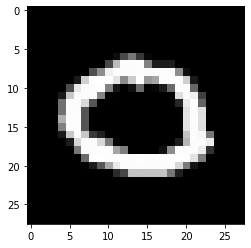

Predict : 0
Correct : 0



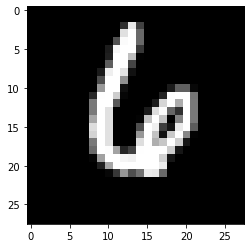

Predict : 6
Correct : 6



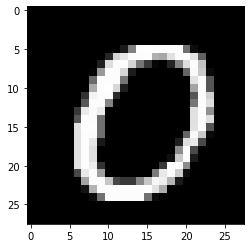

Predict : 0
Correct : 0



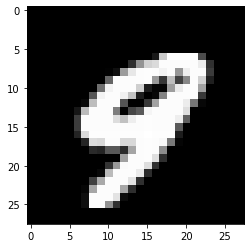

Predict : 9
Correct : 9



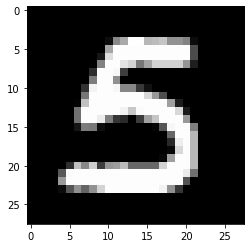

Predict : 5
Correct : 5



In [ ]:
mnist_pred_vec = np.argmax(mnist_pred,axis=1)
for i in np.random.randint(0,70000,10):
  plt.imshow(x_data[i],cmap='gray')
  plt.show()
  print('Predict : %d'%(mnist_pred_vec[i]))
  print('Correct : %d\n'%(y_target[i]))